# Library

In [35]:
import pandas as pd
import numpy as np
from pycaret.classification import *

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os

# Config

In [36]:
DATA_DIR = '../data/'
MODEL_INPUT_DIR = DATA_DIR + '05_model_input/'
MODEL_OUTPUT_DIR = DATA_DIR + '07_model_output/'
DATASET_DIR = 'titanic/'

INPUT_DIR = MODEL_INPUT_DIR + DATASET_DIR
OUTPUT_DIR = MODEL_OUTPUT_DIR + DATASET_DIR

In [37]:
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

In [38]:
ID_COL = 'PassengerId'
Y_COL = 'Survived'

In [39]:
VERSION = 0

# Load data

In [6]:
base_df = pd.read_pickle(INPUT_DIR + 'train_test.pkl')
base_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,flg,fix_Name,len_Name,fix_Ticket,len_Ticket,first_chars_Ticket,fix_Cabin,len_Cabin,first_chars_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train,"Braund, Mr. Owen Harris",23,A/5 21171,9,A,-1,2,
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51,PC 17599,8,P,C85,3,
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,"Heikkinen, Miss. Laina",22,STON/O2. 3101282,16,S,-1,2,
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",44,113803,6,1,C123,4,
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train,"Allen, Mr. William Henry",24,373450,6,3,-1,2,


# Prepare modeling

In [7]:
for c in base_df.columns:
    print("  '" + c + "',")

  'PassengerId',
  'Survived',
  'Pclass',
  'Name',
  'Sex',
  'Age',
  'SibSp',
  'Parch',
  'Ticket',
  'Fare',
  'Cabin',
  'Embarked',
  'flg',
  'fix_Name',
  'len_Name',
  'fix_Ticket',
  'len_Ticket',
  'first_chars_Ticket',
  'fix_Cabin',
  'len_Cabin',
  'first_chars_Cabin',


In [8]:
feature_cols = [
  # 'PassengerId',
  # 'Survived',
  'Pclass',
  # 'Name',
  'Sex',
  'Age',
  'SibSp',
  'Parch',
  # 'Ticket',
  'Fare',
  # 'Cabin',
  'Embarked',
  # 'flg',
  # 'fix_Name',
  # 'len_Name',
  # 'fix_Ticket',
  'len_Ticket',
  'first_chars_Ticket',
  # 'fix_Cabin',
  'len_Cabin',
  'first_chars_Cabin',
]

train_df = base_df[base_df['flg'] == 'train']
test_df = base_df[base_df['flg'] == 'test']

In [9]:
train_df[feature_cols].isnull().sum()

Pclass                  0
Sex                     0
Age                   177
SibSp                   0
Parch                   0
Fare                    0
Embarked                2
len_Ticket              0
first_chars_Ticket      0
len_Cabin               0
first_chars_Cabin       0
dtype: int64

# Modeling

In [10]:
caret_df = train_df.loc[:, feature_cols + [Y_COL]]
caret_df.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,len_Ticket,first_chars_Ticket,len_Cabin,first_chars_Cabin,Survived
0,3,male,22.0,1,0,7.25,S,9,A,2,,0


In [40]:
s = setup(
    caret_df, 
    target = Y_COL,
    log_experiment = True,
    experiment_name = 'TEST_' + str(VERSION),
    log_plots = True,
    # log_profile = True, # for pandas-profiling?
    log_data = True
)

,Description,Value
0,session_id,6109
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(891, 12)"
5,Missing Values,True
6,Numeric Features,2
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [41]:
best_models = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8171,0.8534,0.7257,0.8017,0.7582,0.6119,0.6175,0.0560
lr,Logistic Regression,0.8092,0.8478,0.7178,0.7889,0.7480,0.5953,0.6004,0.8280
ridge,Ridge Classifier,0.8059,0.0000,0.7097,0.7837,0.7419,0.5873,0.5919,0.0100
lightgbm,Light Gradient Boosting Machine,0.8042,0.8476,0.7215,0.7698,0.7422,0.5849,0.5885,0.0240
rf,Random Forest Classifier,0.8027,0.8401,0.7057,0.7754,0.7362,0.5795,0.5838,0.3100
lda,Linear Discriminant Analysis,0.7963,0.8410,0.6975,0.7711,0.7295,0.5671,0.5716,0.0130
ada,Ada Boost Classifier,0.7947,0.8220,0.7263,0.7466,0.7340,0.5673,0.5699,0.0800
dt,Decision Tree Classifier,0.7738,0.7652,0.7302,0.7071,0.7169,0.5290,0.5307,0.0110
et,Extra Trees Classifier,0.7626,0.8111,0.6852,0.7040,0.6923,0.4995,0.5017,0.2670
knn,K Neighbors Classifier,0.6917,0.7235,0.5157,0.6197,0.5597,0.3282,0.3320,0.0270


In [42]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7778,0.8453,0.6800,0.7391,0.7083,0.5293,0.5305
1,0.6667,0.7000,0.6400,0.5714,0.6038,0.3177,0.3192
2,0.8730,0.9389,0.8000,0.8696,0.8333,0.7311,0.7327
3,0.8065,0.8739,0.7500,0.7500,0.7500,0.5921,0.5921
4,0.8387,0.9112,0.8333,0.7692,0.8000,0.6652,0.6667
5,0.8548,0.8761,0.7500,0.8571,0.8000,0.6869,0.6906
6,0.7742,0.8476,0.7083,0.7083,0.7083,0.5241,0.5241
7,0.8710,0.9123,0.7500,0.9000,0.8182,0.7195,0.7266
8,0.8226,0.8081,0.6667,0.8421,0.7442,0.6112,0.6209


In [43]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8254,0.8916,0.7200,0.8182,0.7660,0.6276,0.6309
1,0.6984,0.7642,0.7200,0.6000,0.6545,0.3908,0.3960
2,0.8889,0.9084,0.7600,0.9500,0.8444,0.7597,0.7711
3,0.7419,0.8465,0.6250,0.6818,0.6522,0.4477,0.4487
4,0.8387,0.8558,0.8750,0.7500,0.8077,0.6702,0.6761
5,0.8548,0.9013,0.7500,0.8571,0.8000,0.6869,0.6906
6,0.8226,0.8766,0.7083,0.8095,0.7556,0.6173,0.6207
7,0.8710,0.9123,0.7500,0.9000,0.8182,0.7195,0.7266
8,0.8387,0.7730,0.7083,0.8500,0.7727,0.6493,0.6558


In [44]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7619,0.8621,0.6400,0.7273,0.6809,0.4922,0.4948
1,0.6825,0.7284,0.6400,0.5926,0.6154,0.3458,0.3465
2,0.8254,0.8795,0.8000,0.7692,0.7843,0.6377,0.6381
3,0.8226,0.8542,0.7500,0.7826,0.7660,0.6232,0.6236
4,0.8548,0.8662,0.9167,0.7586,0.8302,0.7054,0.7150
5,0.8548,0.8410,0.7917,0.8261,0.8085,0.6917,0.6921
6,0.8065,0.8580,0.7500,0.7500,0.7500,0.5921,0.5921
7,0.8548,0.8958,0.7500,0.8571,0.8000,0.6869,0.6906
8,0.7258,0.7188,0.6250,0.6522,0.6383,0.4177,0.4179


In [45]:
lgb = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8413,0.8916,0.7600,0.8261,0.7917,0.6638,0.6653
1,0.7619,0.7705,0.6800,0.7083,0.6939,0.4992,0.4995
2,0.7778,0.8884,0.7200,0.7200,0.7200,0.5358,0.5358
3,0.7581,0.8586,0.6667,0.6957,0.6809,0.4862,0.4865
4,0.8226,0.8640,0.8750,0.7241,0.7925,0.6399,0.6487
5,0.8387,0.9134,0.7500,0.8182,0.7826,0.6548,0.6564
6,0.8065,0.8596,0.7500,0.7500,0.7500,0.5921,0.5921
7,0.8065,0.8191,0.6250,0.8333,0.7143,0.5724,0.5860
8,0.8387,0.7632,0.7083,0.8500,0.7727,0.6493,0.6558


In [46]:
models = [lr, gbc, ada, lgb]
blend_soft = blend_models(models, method='soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.8916,0.7600,0.8636,0.8085,0.6953,0.6989
1,0.7143,0.7653,0.6800,0.6296,0.6538,0.4112,0.4121
2,0.8730,0.9232,0.8000,0.8696,0.8333,0.7311,0.7327
3,0.7581,0.8542,0.6667,0.6957,0.6809,0.4862,0.4865
4,0.8548,0.8629,0.8750,0.7778,0.8235,0.7010,0.7045
5,0.8710,0.9090,0.7500,0.9000,0.8182,0.7195,0.7266
6,0.8548,0.8662,0.7500,0.8571,0.8000,0.6869,0.6906
7,0.8710,0.8871,0.7500,0.9000,0.8182,0.7195,0.7266
8,0.8387,0.7917,0.7083,0.8500,0.7727,0.6493,0.6558


In [47]:
finalize_model(blend_soft)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=6109,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('gbc',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init...
                                

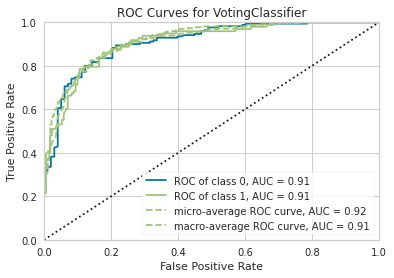

In [48]:
plot_model(blend_soft, 'auc')

# Experiment logging

In [32]:
!mlflow ui --host 0.0.0.0

[2022-04-12 01:54:31 +0000] [2549] [INFO] Starting gunicorn 20.1.0
[2022-04-12 01:54:31 +0000] [2549] [INFO] Listening at: http://0.0.0.0:5000 (2549)
[2022-04-12 01:54:31 +0000] [2549] [INFO] Using worker: sync
[2022-04-12 01:54:31 +0000] [2551] [INFO] Booting worker with pid: 2551
^C
[2022-04-12 01:55:55 +0000] [2549] [INFO] Handling signal: int
[2022-04-12 01:55:55 +0000] [2551] [INFO] Worker exiting (pid: 2551)


# Submission

In [18]:
# blend_soft

In [33]:
predictions = predict_model(blend_soft, test_df.loc[:, feature_cols])
test_df[Y_COL] = predictions['Label']
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,flg,fix_Name,len_Name,fix_Ticket,len_Ticket,first_chars_Ticket,fix_Cabin,len_Cabin,first_chars_Cabin
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,...,Q,test,"Kelly, Mr. James",16,330911,6,3,-1,2,
1,893,0,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,...,S,test,"Wilkes, Mrs. James (Ellen Needs)",32,363272,6,3,-1,2,
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,...,Q,test,"Myles, Mr. Thomas Francis",25,240276,6,2,-1,2,
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,...,S,test,"Wirz, Mr. Albert",16,315154,6,3,-1,2,
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,...,S,test,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",44,3101298,7,3,-1,2,


In [34]:
test_df.loc[:, [ID_COL, Y_COL]].to_csv(OUTPUT_DIR + 'submission.csv', index=False)